In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
students = pd.read_csv(r"C:\Logs\StudentsPerformance.csv")

In [3]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


Find out how many males and females participated in the test.

In [4]:
students.gender.value_counts() # from this it is clear that there are more females.

female    518
male      482
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

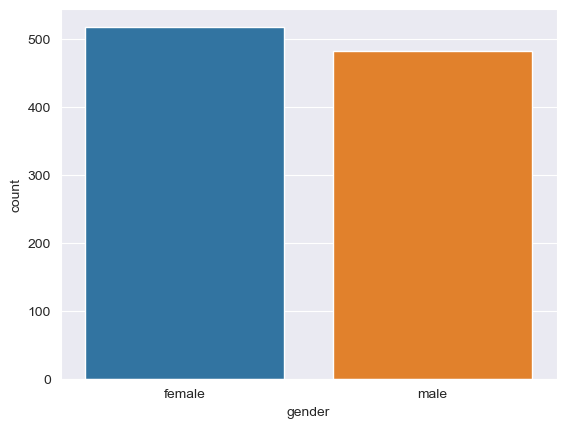

In [5]:
sns.countplot(data = students, x = 'gender')

 What do you think about the students' parental level of education?

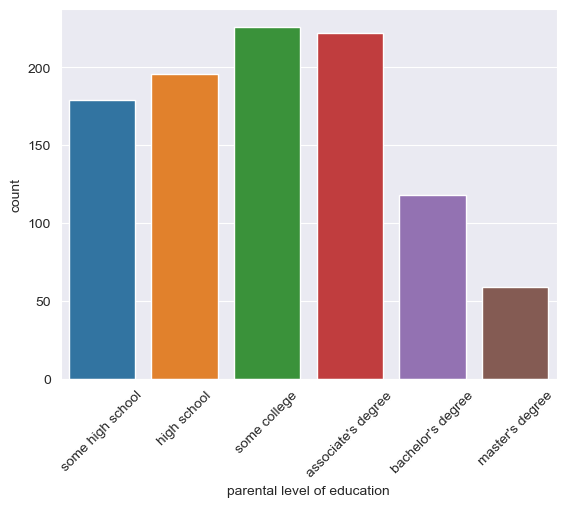

In [6]:
sns.countplot(data = students, x = 'parental level of education')
plt.xticks(rotation = 45)
plt.show()

In [7]:
students.groupby(['parental level of education', 'test preparation course']).size()

parental level of education  test preparation course
associate's degree           completed                   82
                             none                       140
bachelor's degree            completed                   46
                             none                        72
high school                  completed                   56
                             none                       140
master's degree              completed                   20
                             none                        39
some college                 completed                   77
                             none                       149
some high school             completed                   77
                             none                       102
dtype: int64

In [8]:
# from the above table we can see that there is no correlation between the parents education and whether the student completes the course

In [9]:
students['parental level of education'].value_counts()  # this gives us the the educational qualification of parents

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Who scores the most on average for math, reading and writing based on ● Gender ● Test preparation course

In [10]:
students.groupby('gender').mean(['math score', 'reading score', 'writing score']) # on average females tends to score higher in writing and reading while males score higher in math

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [11]:
students.groupby('test preparation course').mean(['math score', 'reading score', 'writing score']) # students who have completed the course tend to score higher

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


What do you think about the scoring variation for math, reading and writing based on ● Gender
● Test preparation course

In [12]:
students.groupby('gender').agg({'math score' : ['std', 'var', 'max', 'min'], 'reading score': ['std', 'var', 'max', 'min'], 'writing score' : ['std', 'var', 'max', 'min']})

math score                      reading score                       \
              std         var  max min           std         var  max min   
gender                                                                      
female  16.029928  256.958593  100   0     14.411018  207.677438  100  17   
male    14.556411  211.889097  100  27     14.149594  200.211010  100  23   

       writing score                       
                 std         var  max min  
gender                                     
female     14.844842  220.369327  100  10  
male       14.227225  202.413924  100  15

In [13]:
# the above data showes us the variance, standard deviation, maximum and minimum values based on gender for each subject

In [15]:
students.groupby('test preparation course').agg({'math score' : ['std', 'var', 'max', 'min'], 'reading score': ['std', 'var', 'max', 'min'], 'writing score' : ['std', 'var', 'max', 'min']})

math score                      reading score  \
                               std         var  max min           std   
test preparation course                                                 
completed                14.521847  210.884027  100  23     13.537572   
none                     15.705689  246.668662  100   0     14.608896   

                                             writing score                   \
                                var  max min           std         var  max   
test preparation course                                                       
completed                183.265864  100  37     13.236412  175.202612  100   
none                     213.419851  100  17     15.041667  226.251739  100   

                             
                        min  
test preparation course      
completed                36  
none                     10

In [16]:
# this is based on test preparation course

The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management
to achieve this.

In [17]:
students[['gender', 'race/ethnicity','test preparation course','math score']].sort_values(by = 'math score', ascending= False).head(250)

,gender,race/ethnicity,test preparation course,math score
999,male,group E,completed,100
996,male,group A,completed,100
515,female,group E,none,100
517,female,group E,none,100
516,female,group E,none,100
...,...,...,...,...
856,male,group E,completed,77
855,male,group E,completed,77
854,male,group D,completed,77
853,male,group D,none,77


In [18]:
# top 25% means the top 250 students in the total 1000, students the above table gives us the complete list of the top 250 students based on their math score